***

# Feature importances for breast cancer dataset
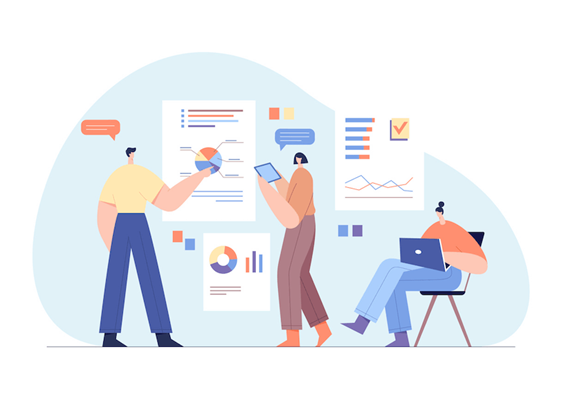
Feature importances refer to the measure of the contribution of each feature in a predictive model towards the outcome or target variable. It helps gaining insights into the relationships between input features and the target variable. Also explaining and interpreting the model's predictions. 

This jupyter notebook contains features importances using various models like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Gradient Boosting, Stochastic Gradient Descent, XGBoost, LGBM.
***

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

In [6]:
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

# Reading the dataset

In [7]:
data=pd.read_csv('breast-cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

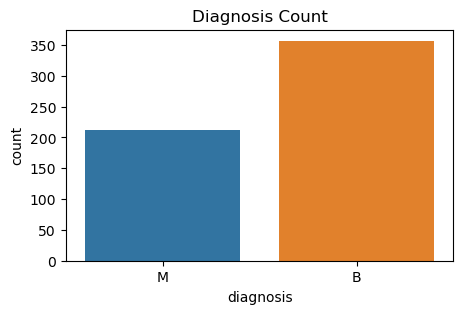

In [11]:
# Count of Diagnosis (M = Malignant, B = Benign)
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count')
plt.show()

In [12]:
data.groupby(data.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [13]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


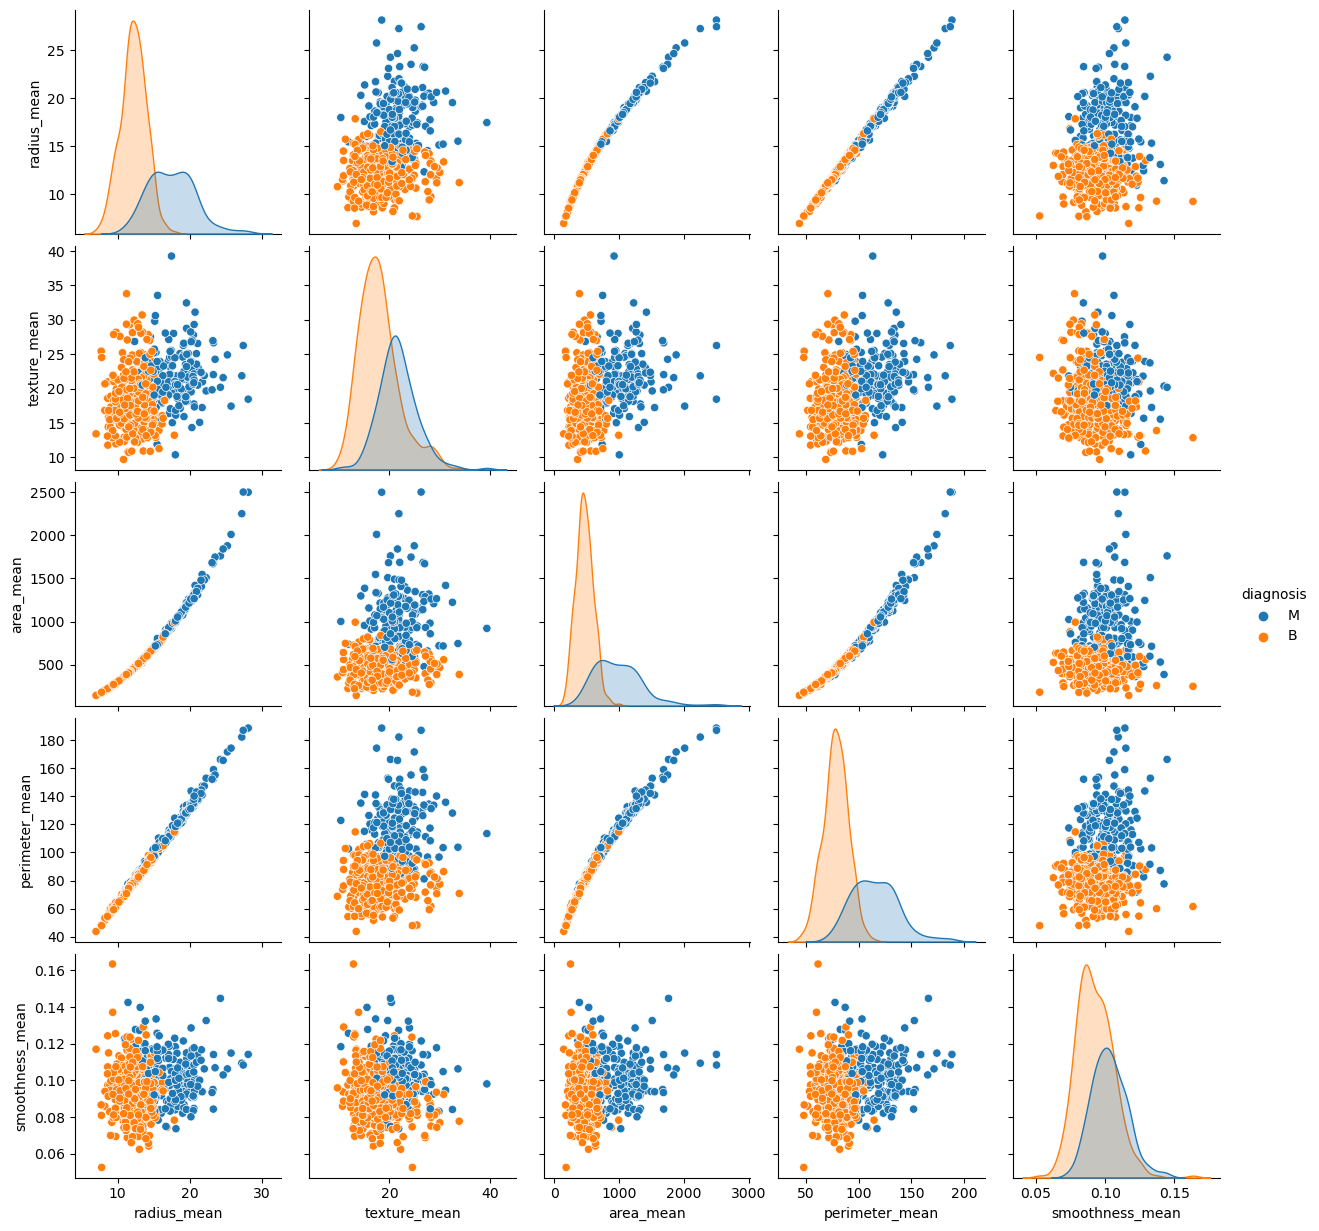

In [16]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

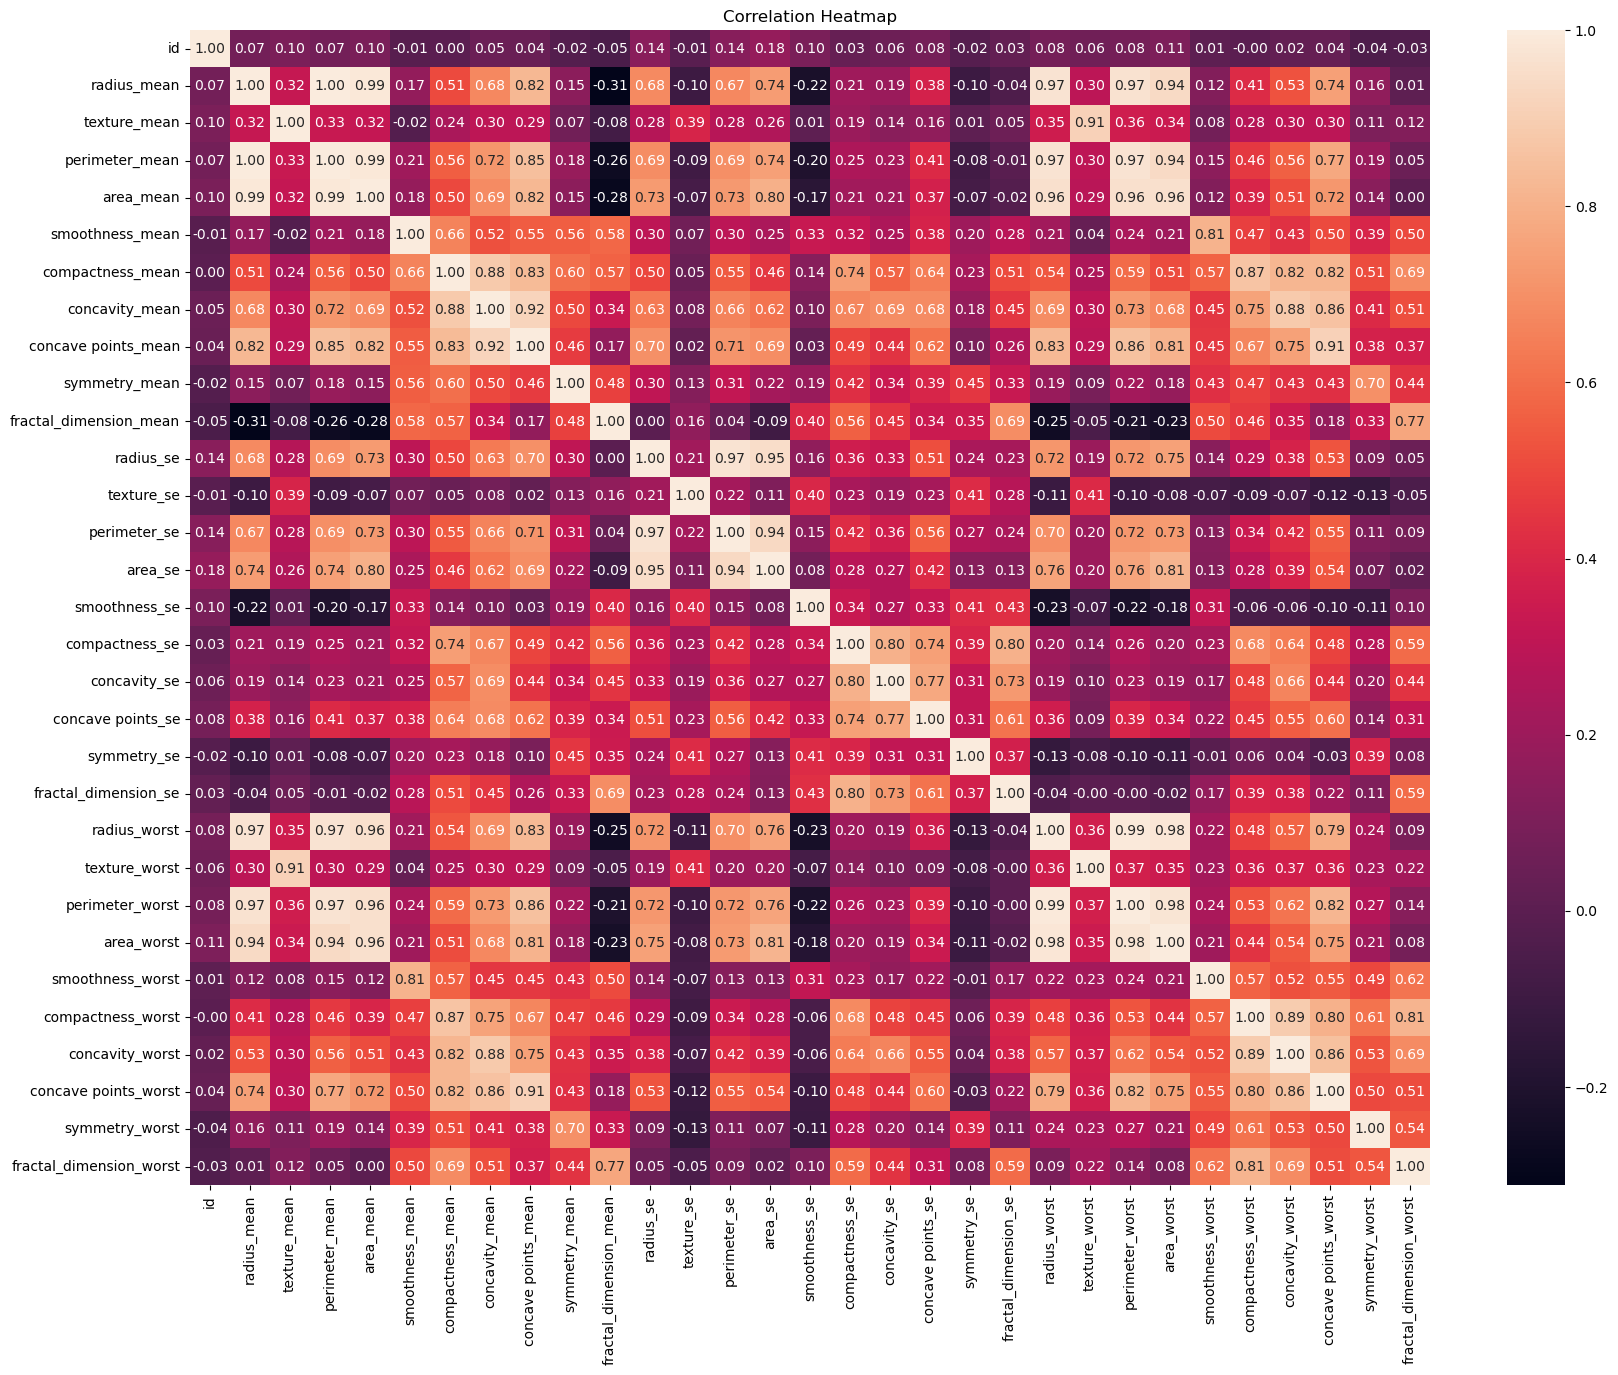

In [17]:
# Correlation heatmap of features
plt.figure(figsize=(20,15))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

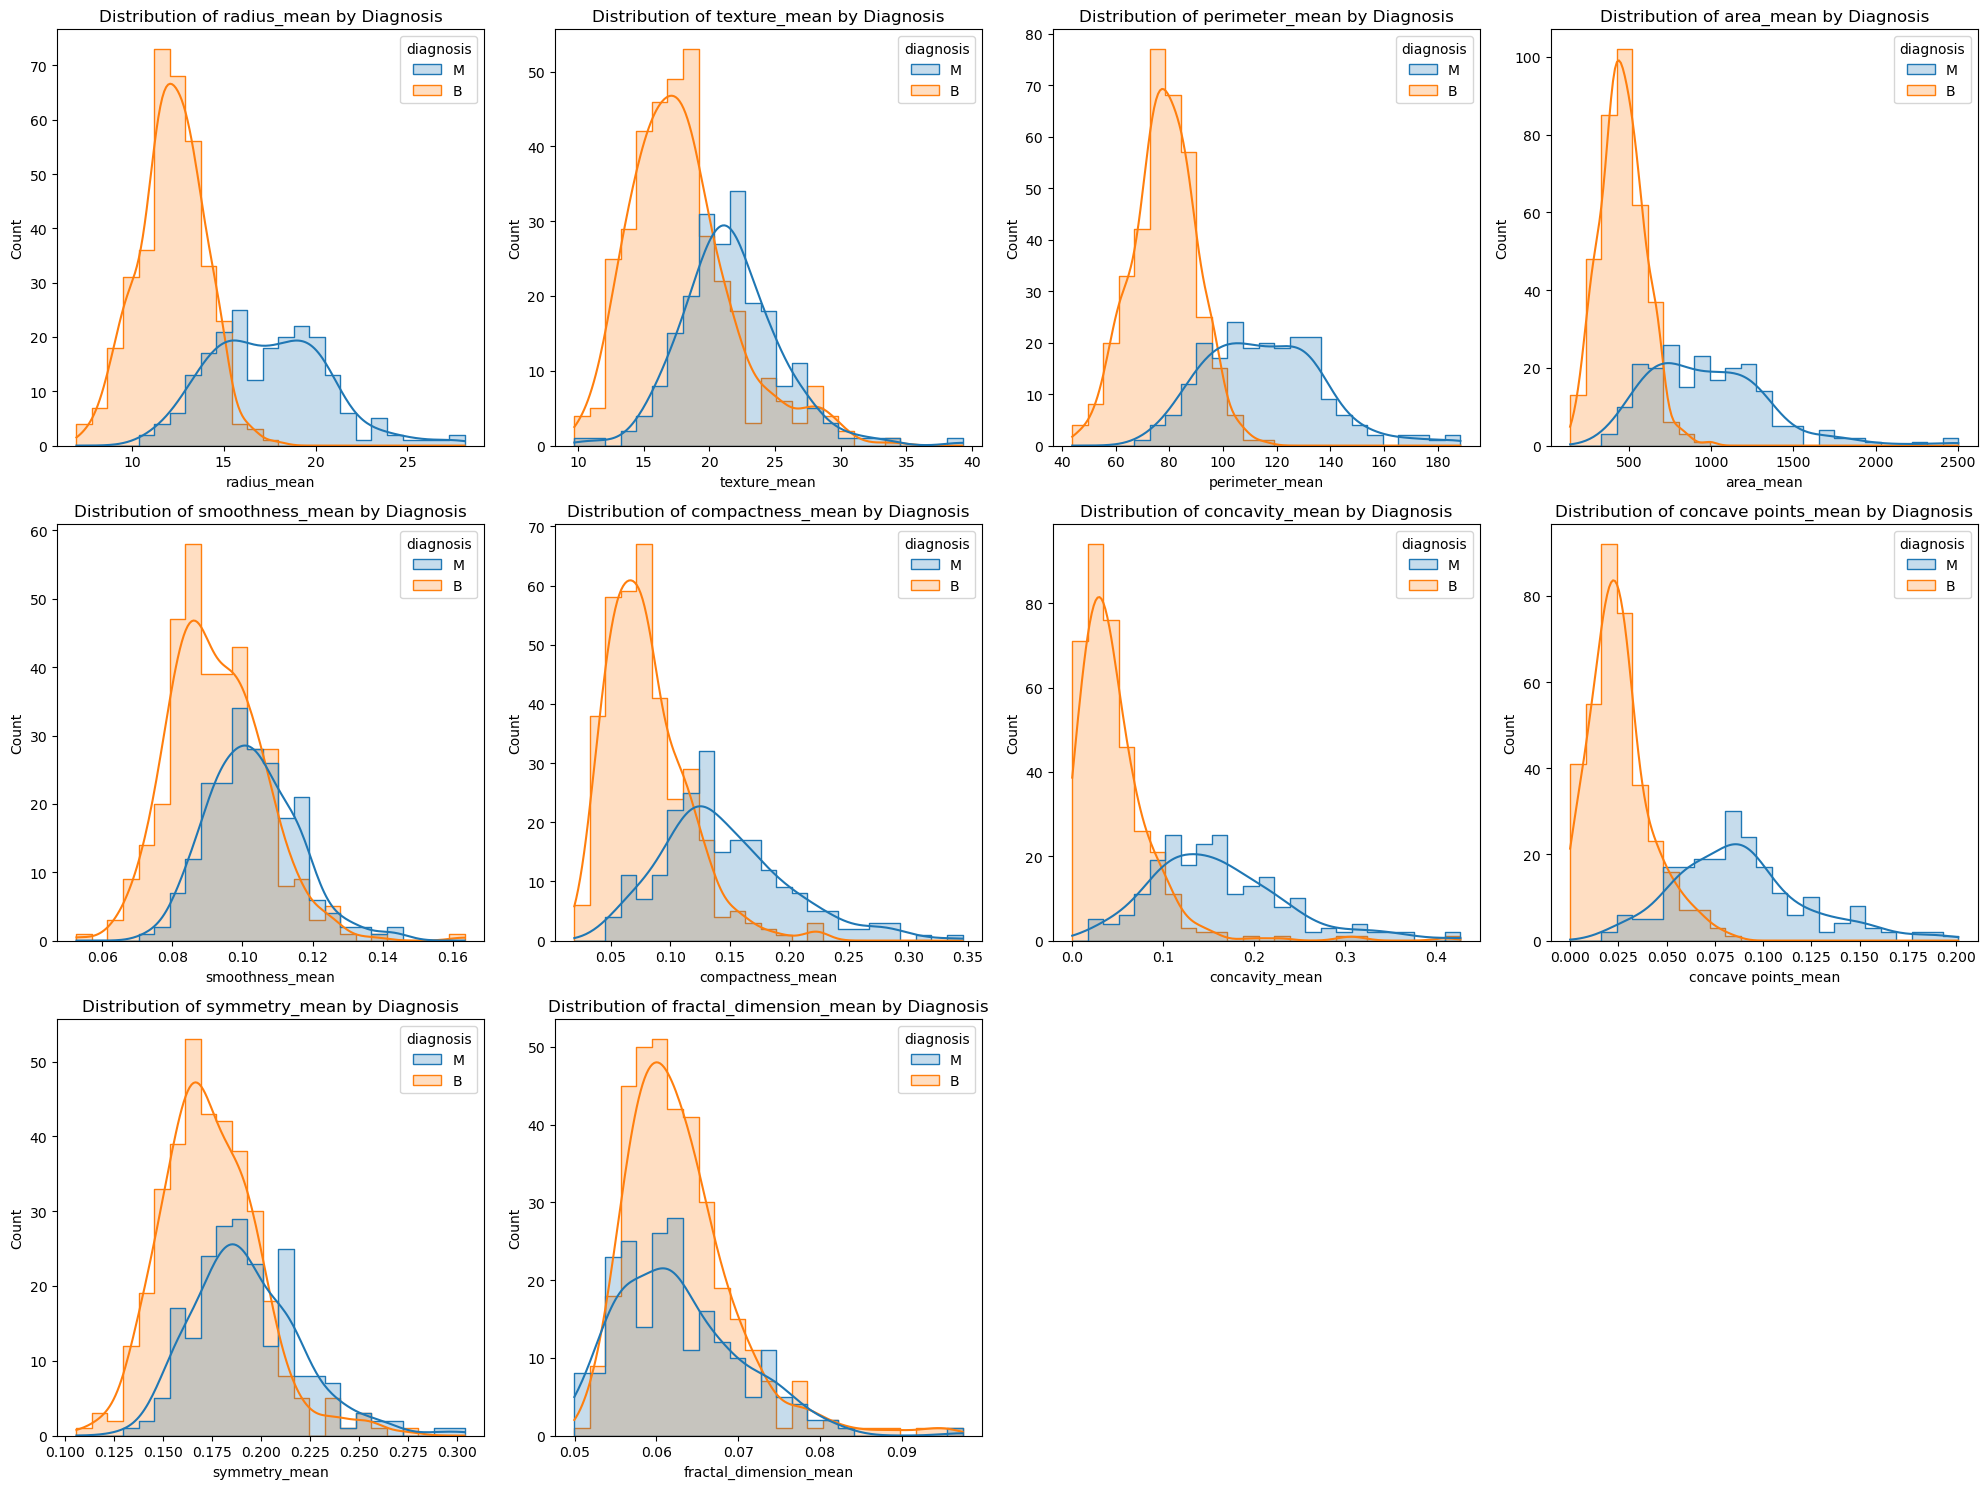

In [18]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = data.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()


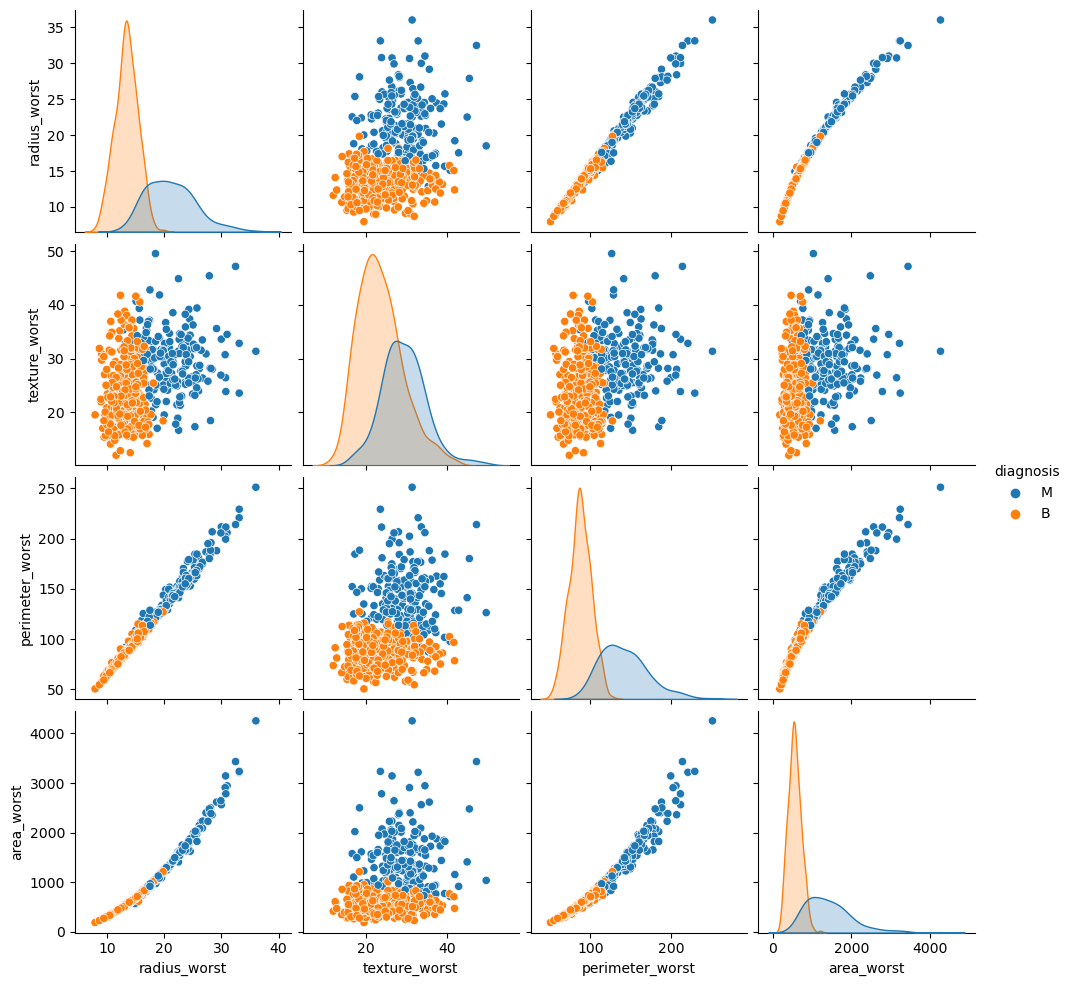

In [19]:
worst_features = data[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']]

# Creating a pairplot for "worst" features
sns.pairplot(worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

# Splitting the dataset

In [20]:
X=data.drop(['id','diagnosis'],axis=1)
y=data['diagnosis'].map(lambda x: 1 if x == 'M' else 0)            

In [21]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
251,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,0.06487
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,...,16.11,23.00,104.60,793.7,0.1216,0.1637,0.06648,0.08485,0.2404,0.06428
552,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,0.05637,...,13.87,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.1246,0.2101,0.28660,0.11200,0.2282,0.06954
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.1419,0.7090,0.90190,0.24750,0.2866,0.11550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.27,17.93,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
137,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.13990,0.08476,0.2676,0.06765
373,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,0.1571,0.05478,...,25.37,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055


In [25]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
537,11.69,24.44,76.37,406.4,0.12360,0.15520,0.045150,0.045310,0.2131,0.07405,...,12.98,32.19,86.12,487.7,0.1768,0.32510,0.13950,0.13080,0.2803,0.09970
190,14.22,23.12,94.37,609.9,0.10750,0.24130,0.198100,0.066180,0.2384,0.07542,...,15.74,37.18,106.40,762.4,0.1533,0.93270,0.84880,0.17720,0.5166,0.14460
536,14.27,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,0.1926,0.05982,...,15.29,34.27,104.30,728.3,0.1380,0.27330,0.42340,0.13620,0.2698,0.08351
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
246,13.20,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.1101,0.15080,0.22980,0.04970,0.2767,0.07198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,...,17.67,29.51,119.10,959.5,0.1640,0.62470,0.69220,0.17850,0.2844,0.11320
156,17.68,20.74,117.40,963.7,0.11150,0.16650,0.185500,0.105400,0.1971,0.06166,...,20.47,25.11,132.90,1302.0,0.1418,0.34980,0.35830,0.15150,0.2463,0.07738
315,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174


In [26]:
y_train

251    0
169    0
552    0
514    1
430    1
      ..
347    0
94     1
137    0
373    1
465    0
Name: diagnosis, Length: 455, dtype: int64

# Scaling the data

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [29]:
X_train

array([[-0.73898551, -0.18643727, -0.76280107, ..., -0.73440539,
        -0.2274427 , -1.07659428],
       [ 0.27217106, -0.53602635,  0.20776564, ..., -0.43107302,
        -0.79364215, -1.11113061],
       [-0.36890803,  2.37255483, -0.42136806, ..., -0.7415941 ,
        -0.7885868 , -1.07835036],
       ...,
       [-0.75938348, -0.899599  , -0.77210903, ..., -0.43247951,
        -0.33529022, -0.91386378],
       [ 1.9244067 , -0.4428026 ,  1.84004392, ...,  1.54347847,
        -0.31338369, -0.74410895],
       [-0.23195023,  0.20510251, -0.1878228 , ...,  0.36359214,
        -0.05050538,  2.43733074]])

In [30]:
X_train.shape

(455, 30)

In [31]:
y_train.shape

(455,)

In [32]:
y_test.shape

(114,)

In [33]:
X_test.shape

(114, 30)

# Model and Feature importance


* ## Logistic Regression 

In [34]:
LR=LogisticRegression()

In [35]:
LR.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.98      0.94      0.96        50

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [38]:
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9591836734693877
Recall : 0.94
Precision : 0.9791666666666666


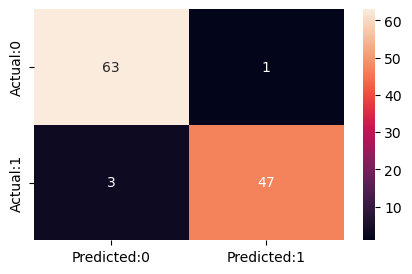

In [39]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [40]:
LR.coef_

array([[ 0.27769595,  0.79319742,  0.30324848,  0.36126203,  0.24169646,
        -0.50741561,  0.69862719,  0.80839278,  0.03652438, -0.1921445 ,
         1.24708139, -0.39741329,  0.86692633,  0.93406089,  0.28812378,
        -0.9145211 , -0.04388941,  0.40174543, -0.52194428, -0.57316279,
         0.97635455,  1.00487016,  0.89999893,  0.91545742,  0.63678262,
        -0.14569752,  0.73747526,  1.00034097,  0.70951221,  0.41219903]])

In [41]:
coefficients = LR.coef_[0]
importances= np.abs(coefficients)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
10,radius_se,1.247081,6.99
21,texture_worst,1.004870,5.63
27,concave points_worst,1.000341,5.60
20,radius_worst,0.976355,5.47
13,area_se,0.934061,5.23


<Axes: ylabel='Feature'>

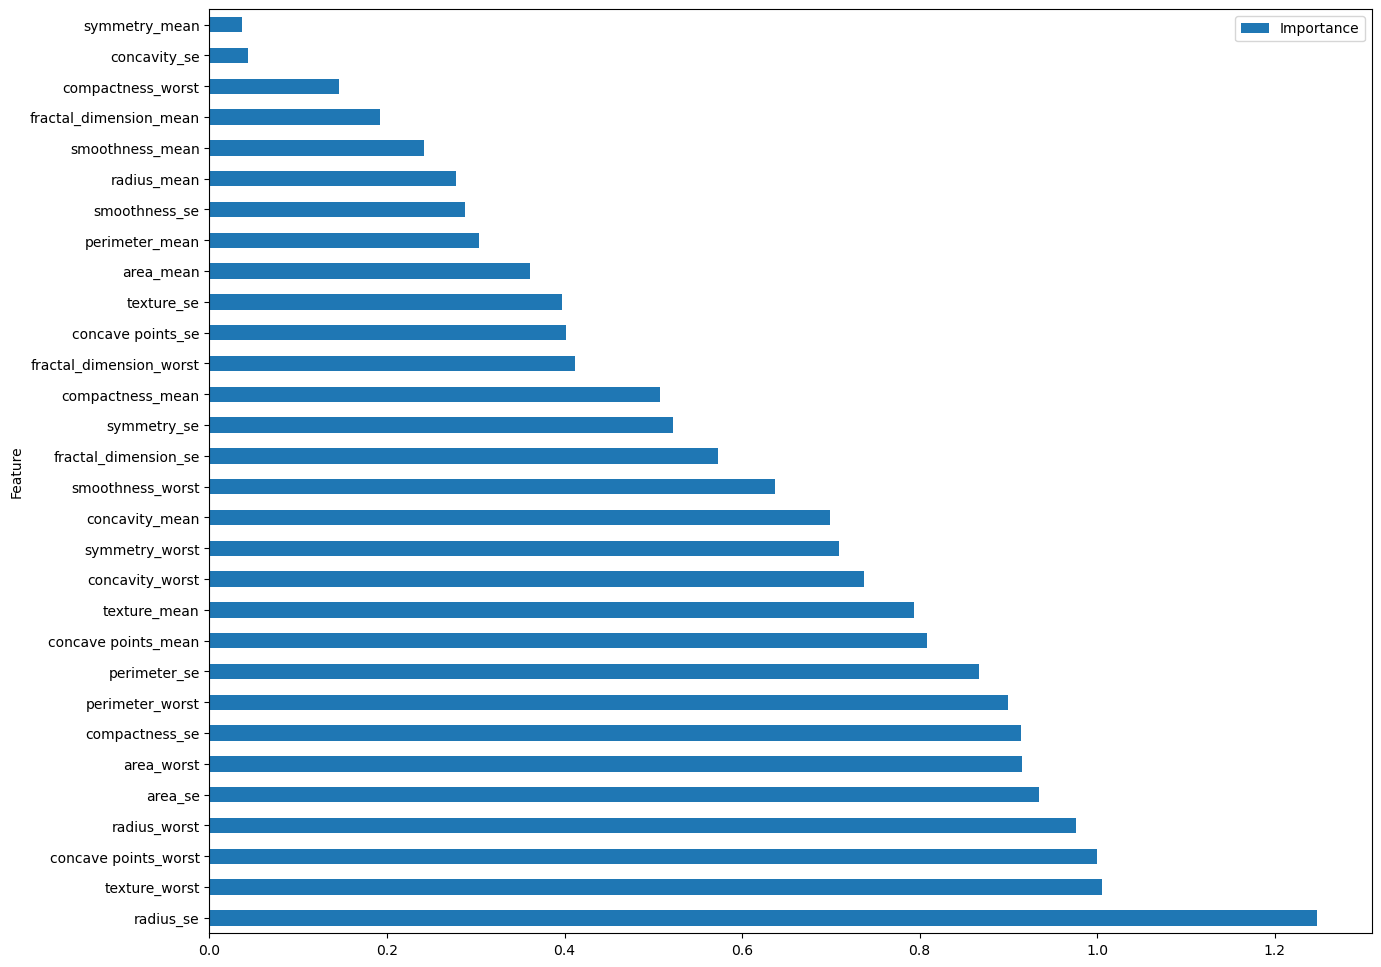

In [42]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using Logistic Regression model.
> The top 5 important features as per the LR model are:
> * compactness_se	
> * radius_se
> * texture_worst
> * concave points_worst
> * radius_worst

* ## Support Vector Machine

In [43]:
svm=SVC(kernel='linear')

In [44]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
y_pred=svm.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.96      0.97        50

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [47]:
train_acc=svm.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.989010989010989
Testing Accuracy : 0.9736842105263158
F1 Score : 0.9696969696969697
Recall : 0.96
Precision : 0.9795918367346939


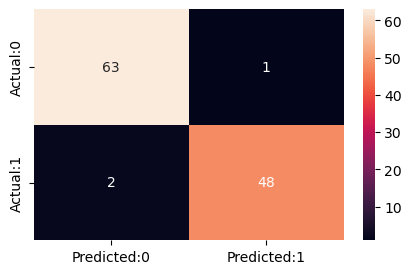

In [48]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [49]:
svm.coef_

array([[ 0.08251141,  0.55938742,  0.14520768,  0.14901227, -0.03128889,
        -0.33634651,  0.5274992 ,  0.63968592,  0.07885109, -0.12554225,
         0.67960482, -0.39022048,  0.5220028 ,  0.87704015,  0.20373034,
        -0.76188526,  0.00553274,  0.38677091, -0.10855434, -0.51351714,
         0.80882354,  0.68182611,  0.73057496,  0.85319585,  0.54092745,
        -0.30419106,  0.62615248,  0.36614343,  0.483855  ,  0.43056594]])

In [50]:
coefficients = svm.coef_[0]
importances = np.abs(coefficients)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
13,area_se,0.877040,6.77
23,area_worst,0.853196,6.59
20,radius_worst,0.808824,6.25
15,compactness_se,0.761885,5.88
22,perimeter_worst,0.730575,5.64


<Axes: ylabel='Feature'>

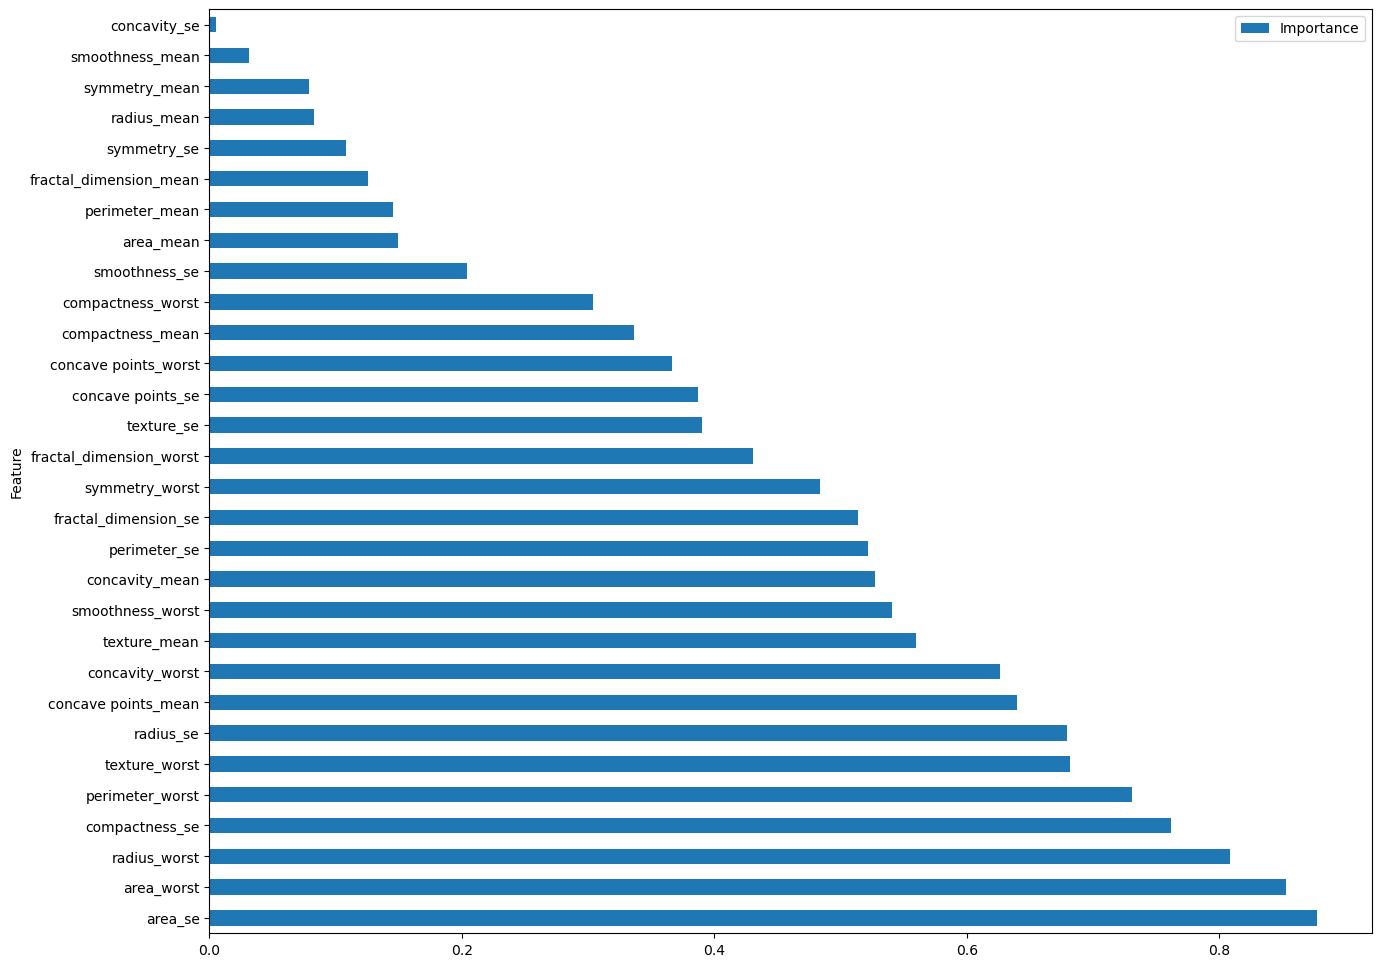

In [51]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using Support Vector Machine model.
> The top 5 important features as per the SVM model are:
> * compactness_se	
> * fractal_dimension_worst
> * concave points_mean
> * texture_worst
> * radius_se

* ## Decision Tree

In [52]:
DT=DecisionTreeClassifier(random_state=8)

In [53]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [54]:
y_pred=DT.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.96      0.94      0.95        50

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [56]:
train_acc=DT.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.956140350877193
F1 Score : 0.9494949494949495
Recall : 0.94
Precision : 0.9591836734693877


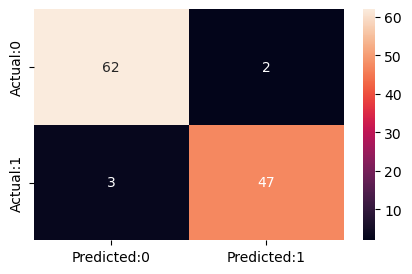

In [57]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [58]:
DT.feature_importances_

array([0.        , 0.04345567, 0.        , 0.        , 0.        ,
       0.        , 0.03663909, 0.00838758, 0.00905326, 0.01539055,
       0.        , 0.        , 0.        , 0.00306879, 0.0018077 ,
       0.        , 0.00639054, 0.        , 0.        , 0.02942553,
       0.        , 0.03834003, 0.        , 0.6991789 , 0.        ,
       0.        , 0.        , 0.09977876, 0.00908361, 0.        ])

In [59]:
importances=DT.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
23,area_worst,0.699179,69.92
27,concave points_worst,0.099779,9.98
1,texture_mean,0.043456,4.35
21,texture_worst,0.038340,3.83
6,concavity_mean,0.036639,3.66


<Axes: ylabel='Feature'>

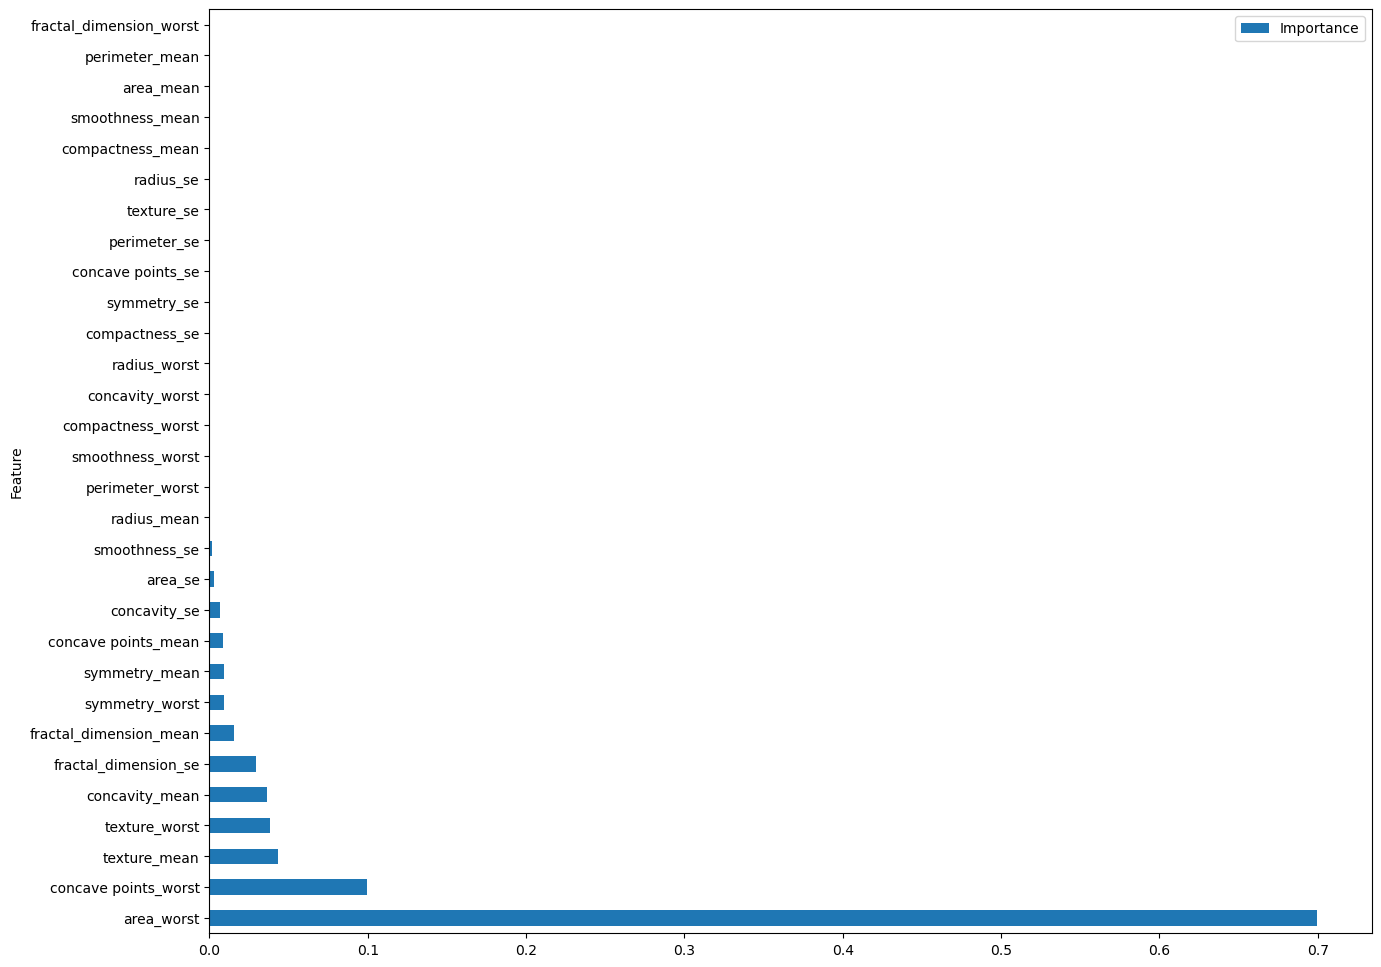

In [60]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using Logistic Regression model.
> The top 5 important features as per the LR model are:
> * compactness_se	
> * radius_se
> * texture_worst
> * concave points_worst
> * radius_worst

* ## Random forest

In [61]:
RF=RandomForestClassifier(n_estimators=50,random_state=1)

In [62]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [63]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.98      0.92      0.95        50

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [65]:
train_acc=RF.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.956140350877193
F1 Score : 0.9484536082474226
Recall : 0.92
Precision : 0.9787234042553191


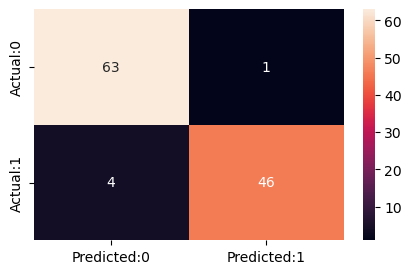

In [66]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [67]:
importances = RF.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
23,area_worst,0.162353,16.24
22,perimeter_worst,0.139691,13.97
27,concave points_worst,0.080955,8.10
7,concave points_mean,0.077525,7.75
6,concavity_mean,0.075464,7.55


<Axes: ylabel='Feature'>

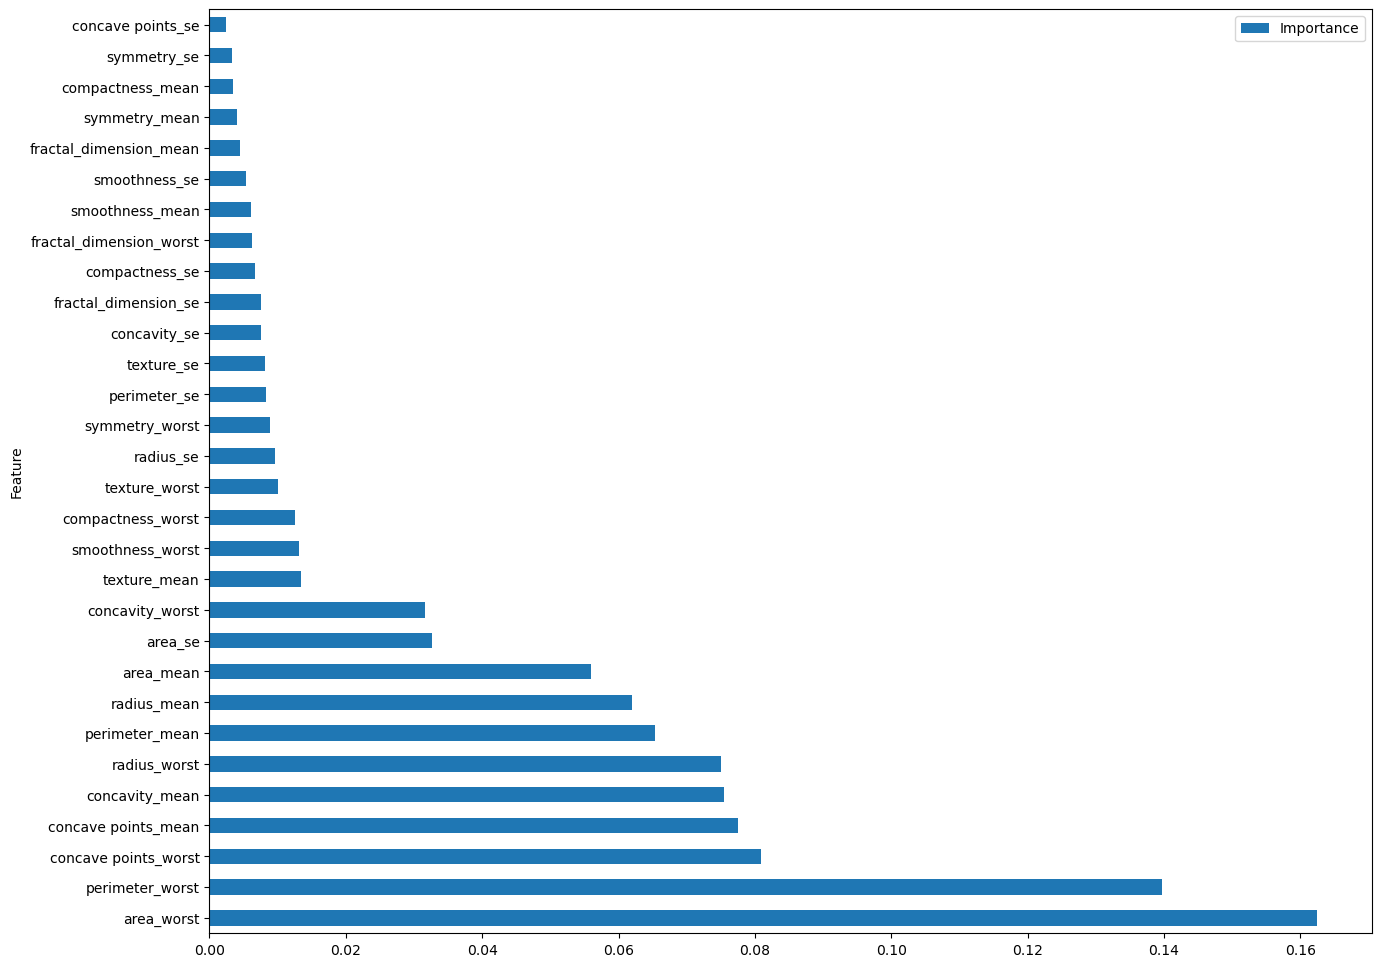

In [68]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using Random Forest model.
> The top 5 important features as per the RF model are:
> * area_worst	
> * perimeter_worst
> * concave points_worst
> * concave points_mean
> * radius_worst

* ## Gradient Boosting

In [69]:
GB=GradientBoostingClassifier(n_estimators=12)

In [70]:
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [71]:
y_pred=GB.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.98      0.90      0.94        50

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [73]:
train_acc=GB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9846153846153847
Testing Accuracy : 0.9473684210526315
F1 Score : 0.9375
Recall : 0.9
Precision : 0.9782608695652174


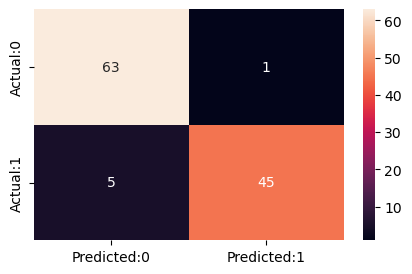

In [74]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [75]:
GB.feature_importances_

array([0.00000000e+00, 3.17852205e-02, 3.42189043e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.22426877e-02, 2.32991341e-02,
       0.00000000e+00, 0.00000000e+00, 4.08096875e-03, 4.92794927e-03,
       1.65322950e-03, 8.17504471e-03, 2.07495903e-03, 2.59457934e-03,
       3.41175944e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.08127525e-02, 2.26050224e-01, 5.36138841e-01,
       7.13464174e-03, 0.00000000e+00, 7.85227555e-03, 8.74235442e-02,
       0.00000000e+00, 0.00000000e+00])

In [76]:
importances = GB.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
23,area_worst,0.536139,53.61
22,perimeter_worst,0.226050,22.61
27,concave points_worst,0.087424,8.74
1,texture_mean,0.031785,3.18
21,texture_worst,0.030813,3.08


<Axes: ylabel='Feature'>

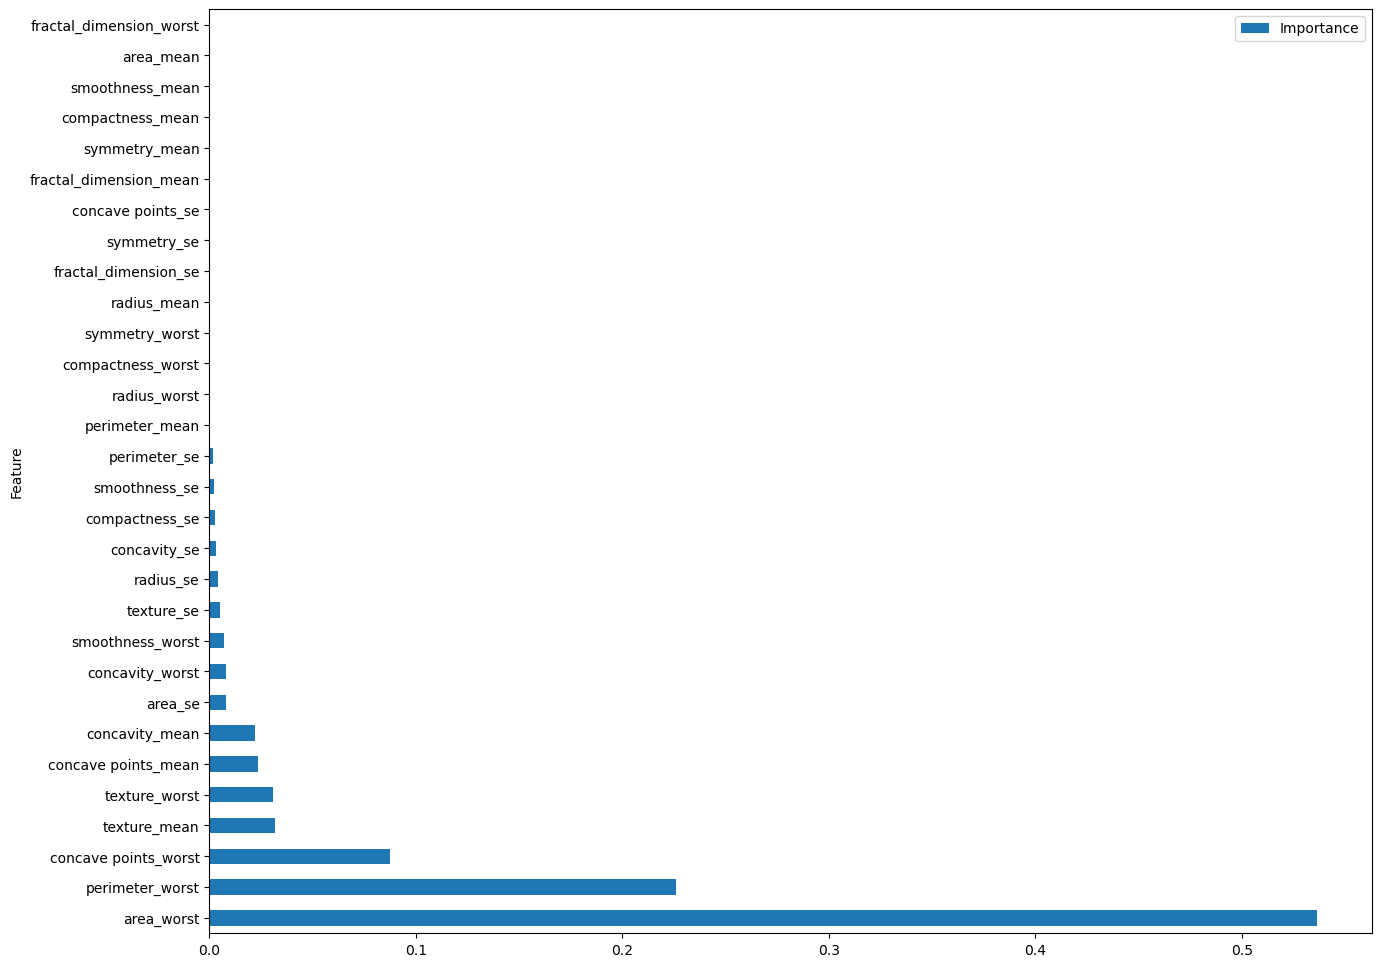

In [77]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using Gradient Boosting model.
> The top 5 important features as per the GB model are:
> * concave points_worst	
> * perimeter_worst	
> * radius_worst
> * texture_worst
> * concave points_mean

* ## Stochastic Gradient Descent

In [78]:
SGD=SGDClassifier(loss='modified_huber', random_state=10)

In [79]:
SGD.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', random_state=10)

In [80]:
y_pred=SGD.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.91      0.96      0.93        50

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [82]:
train_acc=SGD.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9320388349514563
Recall : 0.96
Precision : 0.9056603773584906


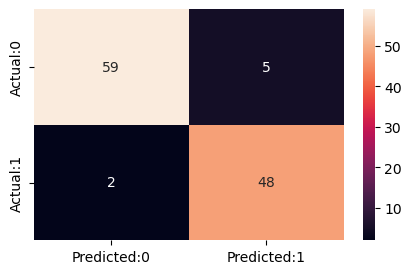

In [83]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [84]:
SGD.coef_

array([[ -1.88307544,  30.4469883 ,  -1.76505619,   4.36784132,
         20.38606752, -58.30064517,  30.33589786,  29.11194713,
         -6.56553798,  -7.29480673,  76.25015588, -35.70498964,
         36.21393723,  59.97830741,  19.53715151, -27.78350361,
        -25.69292083,  27.09483205, -28.41025589, -25.50656611,
         44.021913  ,  55.24013735,  35.3932134 ,  38.05890239,
         12.40591066,  -2.15647142,  33.40379781,  52.23522524,
         43.02095573,  27.81770896]])

In [85]:
coefficients = SGD.coef_[0]
importances = np.abs(coefficients)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
10,radius_se,76.250156,8.51
13,area_se,59.978307,6.69
5,compactness_mean,58.300645,6.50
21,texture_worst,55.240137,6.16
27,concave points_worst,52.235225,5.83


<Axes: ylabel='Feature'>

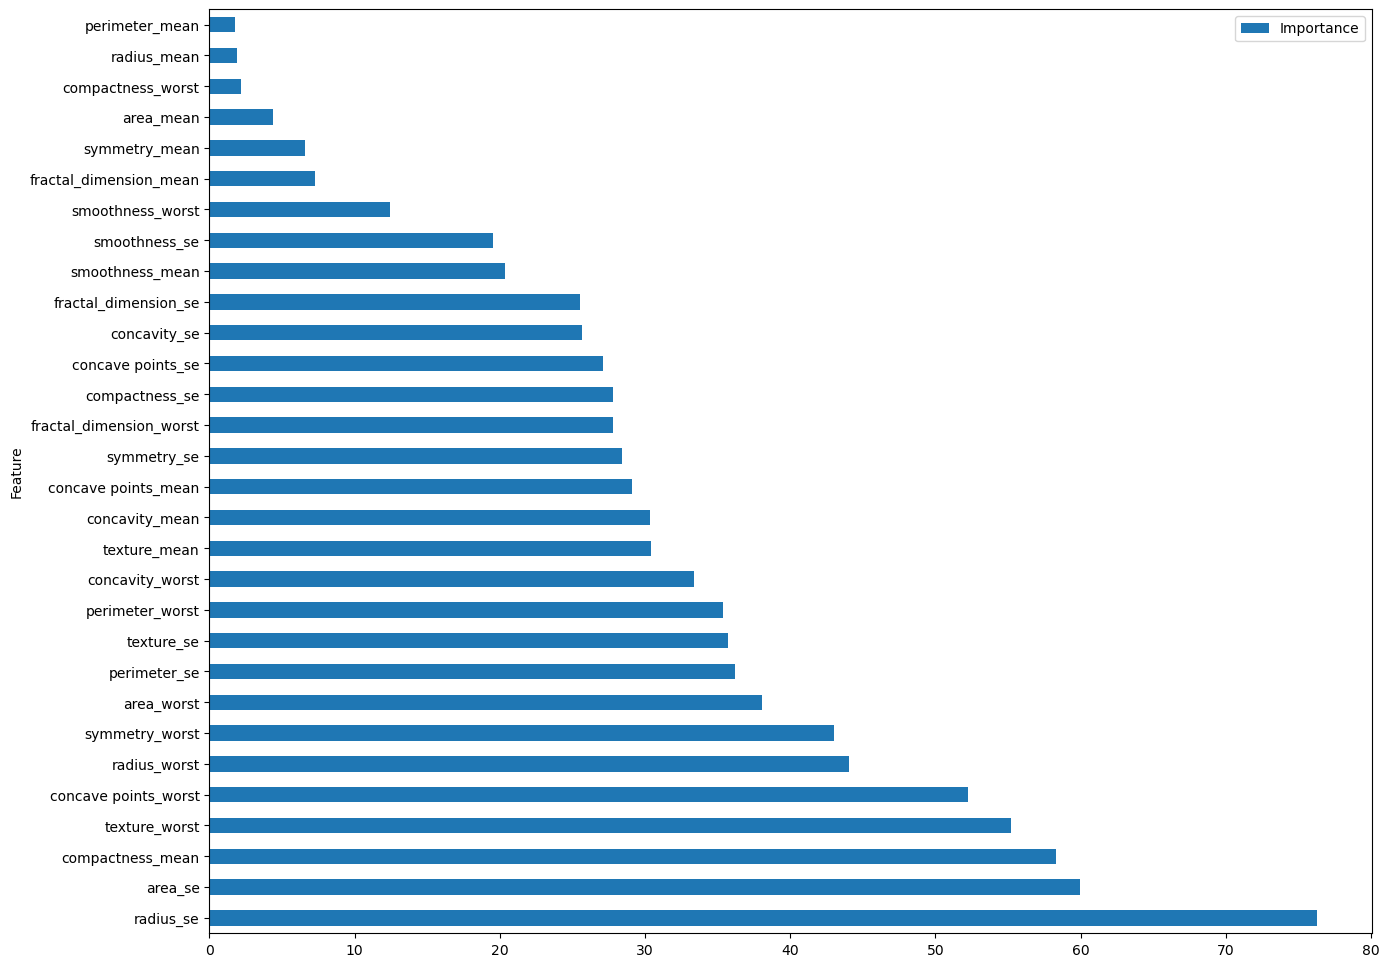

In [86]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using Stochastic Gradient Descent model.
> The top 5 important features as per the SGD model are:
> * radius_se
> * concavity_mean
> * compactness_se	
> * concave points_worst
> * radius_worst

* ## XGBoost	

In [87]:
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree') 

In [88]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=88, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [89]:
y_pred=XGB.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1])

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.98      0.99        50

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [91]:
train_acc=XGB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9912280701754386
F1 Score : 0.98989898989899
Recall : 0.98
Precision : 1.0


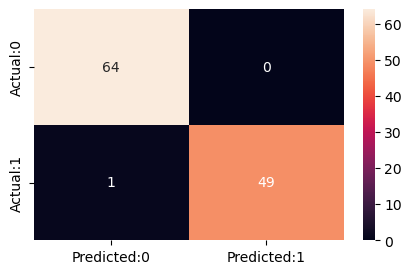

In [92]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [93]:
XGB.feature_importances_

array([0.00069326, 0.01775193, 0.        , 0.00138212, 0.00266438,
       0.00860666, 0.05638001, 0.03233664, 0.00567684, 0.00395392,
       0.01194845, 0.00312717, 0.        , 0.01011113, 0.00488859,
       0.00806634, 0.03328536, 0.00519813, 0.00198347, 0.00078652,
       0.01106513, 0.01735141, 0.42182878, 0.25376022, 0.00902416,
       0.        , 0.01896906, 0.05016331, 0.00508512, 0.00391195],
      dtype=float32)

In [94]:
importances = XGB.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
22,perimeter_worst,0.421829,42.180000
23,area_worst,0.253760,25.379999
6,concavity_mean,0.056380,5.640000
27,concave points_worst,0.050163,5.020000
16,concavity_se,0.033285,3.330000


<Axes: ylabel='Feature'>

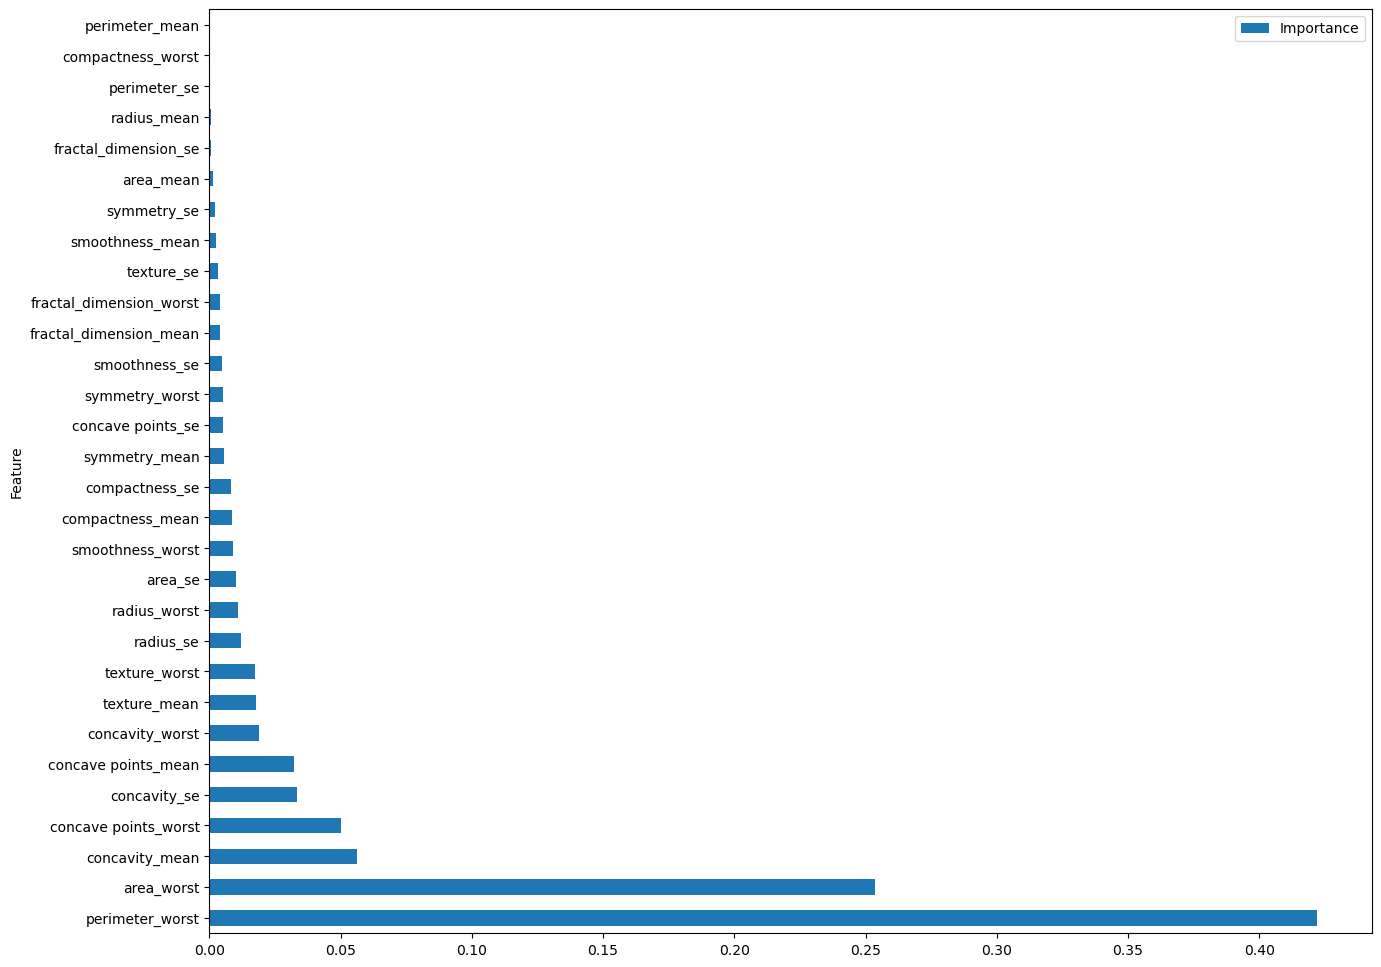

In [95]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using XGBoost model.
> The top 5 important features as per the XGB model are:
> * concave points_worst	
> * concave points_mean
> * radius_worst
> * area_worst
> * texture_mean

* ## LGBM

In [96]:
LGBM=LGBMClassifier(random_state=0,n_estimators=22)

In [97]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 162, number of negative: 293
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4543
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356044 -> initscore=-0.592576
[LightGBM] [Info] Start training from score -0.592576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(n_estimators=22, random_state=0)

In [98]:
y_pred=LGBM.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.98      0.94      0.96        50

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [100]:
train_acc=LGBM.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9824175824175824
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9591836734693877
Recall : 0.94
Precision : 0.9791666666666666


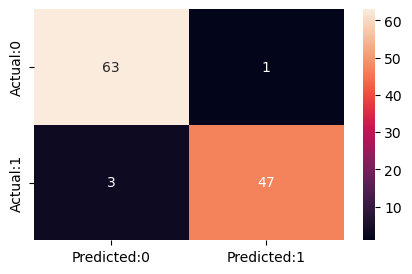

In [101]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [102]:
LGBM.feature_importances_

array([13, 33,  6,  1, 12,  2, 10, 13,  5, 23, 17, 14,  5, 23,  7,  5,  2,
       13,  5,  1,  9, 49, 26, 18, 14,  5,  7, 35, 16, 12])

In [103]:
importances = LGBM.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
21,texture_worst,49,12.22
27,concave points_worst,35,8.73
1,texture_mean,33,8.23
22,perimeter_worst,26,6.48
9,fractal_dimension_mean,23,5.74


<Axes: ylabel='Feature'>

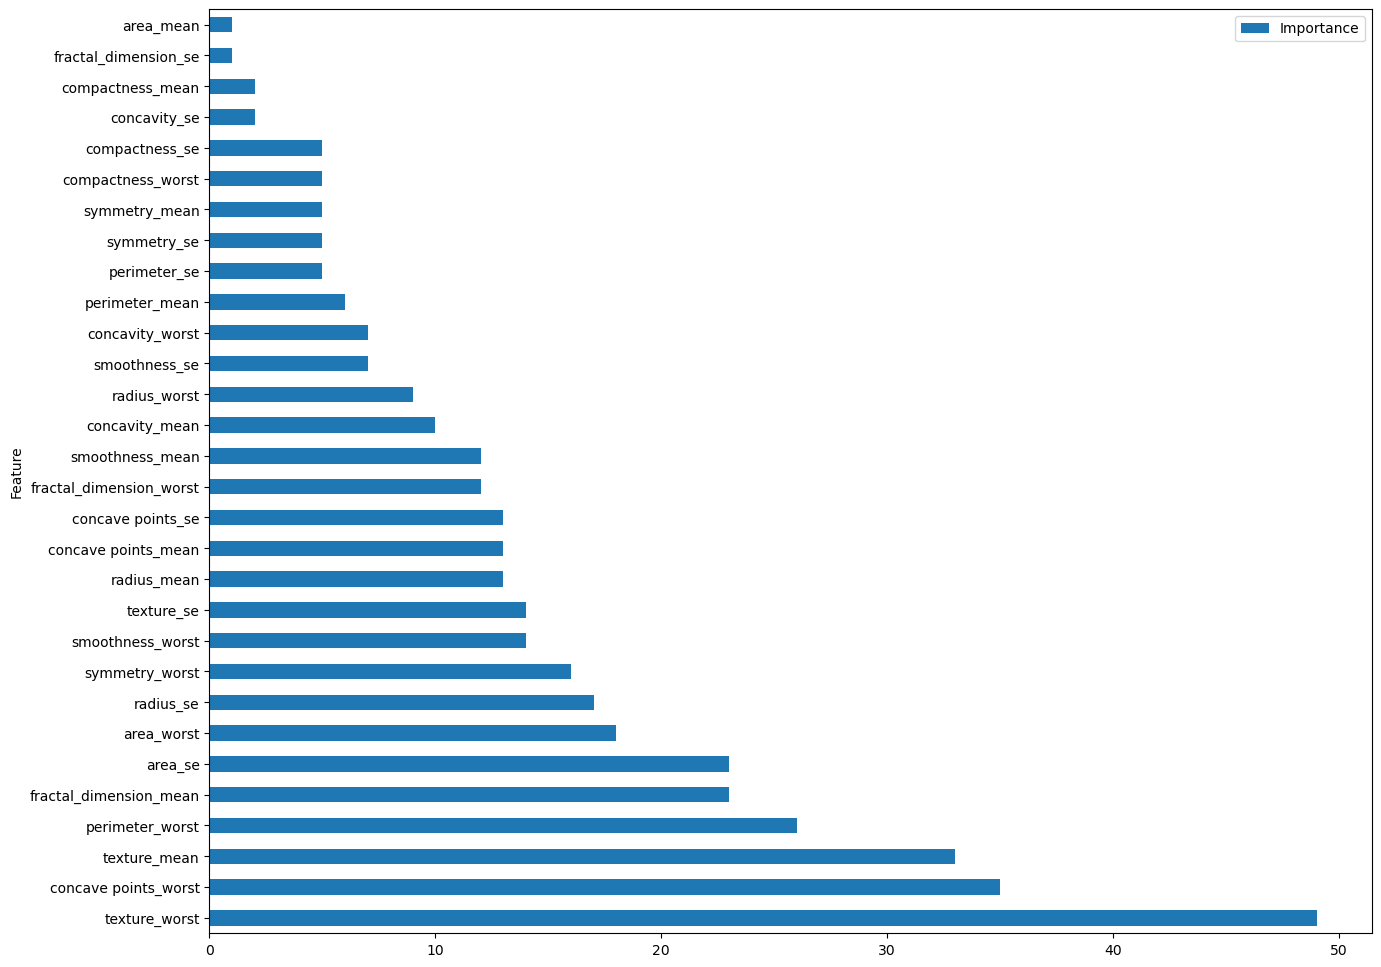

In [104]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

> From the above barplot, we can observe the importance of each feature using LGBM model.
> The top 5 important features as per the LGBM model are:
> * concave points_worst	
> * area_se
> * concave points_mean	
> * texture_worst
> * texture_mean